# OPTIMIZATION TD2 - Notebook

## Constraints

$$
\begin{cases} 
  -x1 \leq 0 \\
  -x2 \leq 0 \\
  3x1-4x2 \leq 1 \\
  x2 \leq 1
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from simplexe import simplexe

Describe the ball situated at the position xc and radius and write the objective of the design in terms of an optimization of the radius of such a ball.

$$
\{ x \mid |x - x_c| \leq \rho \} = B(x_c, \rho)
$$

Maximize $\rho$

$$
B(x_c, \rho) \in P
$$

$$
x_c \in D \Rightarrow x_c^{(1)} = x_c^{(2)} \Rightarrow \begin{bmatrix} 
1 \\ 
-1 
\end{bmatrix}
x = 0
$$

Initialization of data

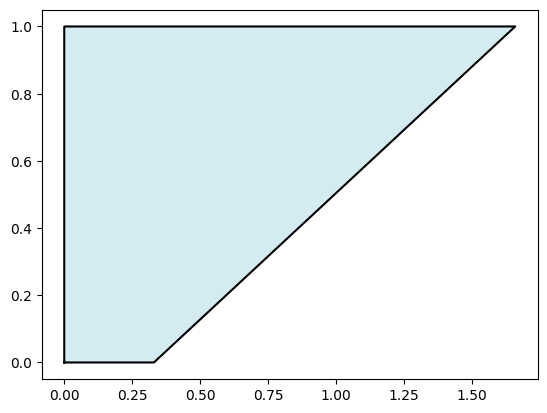

In [2]:
PV = np.array([[0, 0], [0, 1], [1.66, 1], [0.33, 0]])  # Pv are the vertices of the polyhedron P
A = np.array([[0., -1.], [-1., 0.], [3., -4.], [0., 1.]])
b = np.array([0., 0., 1., 1.])

pgn = Polygon(PV)

x, y = pgn.exterior.xy
plt.fill(x, y, color='lightblue', alpha=0.5)
plt.plot(x, y, color='black')
plt.show()


Normalizing the half-space representation

In [3]:
# Normalize the half-space representation so that each constraint has a norm = 1
A_norm = A.copy()
b_norm = b.copy()

for i in range(A.shape[0]):
    norm_A = np.linalg.norm(A[i, :])
    if norm_A != 0:
        b_norm[i] = b_norm[i] / norm_A
        A_norm[i, :] = A[i, :] / norm_A
    else:
        # If the norm is zero, leave the row unchanged
        print(f"Row {i} has zero norm, skipping normalization.")

print("A:", A_norm, "B:", b_norm)

A: [[ 0.  -1. ]
 [-1.   0. ]
 [ 0.6 -0.8]
 [ 0.   1. ]] B: [0.  0.  0.2 1. ]


LP Formulation for Chebyshev Ball Construction

In [4]:
# Create the matrices for the LP formulation of the Chebyshev ball construction
# Maximize c * x subject to A_bar * x = b_bar

# Objective function c (to maximize the radius of the Chebyshev ball)
c = np.array([0., 0., -1.])

# Matrix A_bar and vector b_bar 
A_bar = np.hstack([A_norm, np.ones((A_norm.shape[0], 1))])
A_bottom = np.array([[-1, 1, 0], [1, -1, 0]])
A_bar = np.vstack([A_bar, A_bottom])
b_bar = np.hstack([b_norm, np.array([0,0])])

# Standard form
c = np.hstack([c, np.zeros((6))])
A_bar = np.hstack([A_bar, np.eye(6)])

# Display the results
print("A_bar:\n", A_bar)
print("b_bar:\n", b_bar)
print("Objective vector c:\n", c)

A_bar:
 [[ 0.  -1.   1.   1.   0.   0.   0.   0.   0. ]
 [-1.   0.   1.   0.   1.   0.   0.   0.   0. ]
 [ 0.6 -0.8  1.   0.   0.   1.   0.   0.   0. ]
 [ 0.   1.   1.   0.   0.   0.   1.   0.   0. ]
 [-1.   1.   0.   0.   0.   0.   0.   1.   0. ]
 [ 1.  -1.   0.   0.   0.   0.   0.   0.   1. ]]
b_bar:
 [0.  0.  0.2 1.  0.  0. ]
Objective vector c:
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]


Using the Simplexe Method (Implementation of Simplexe Needed)

In [8]:
# Simplexe function call and extracting the results
# _, _, _, X, _ = simplexe(A_bar, b_bar, c)
simplexe(A_bar, b_bar, c)

# Extract the center (xc) and radius (r) of the Chebyshev ball
# xc = X[:2]
# r = X[2]

KeyboardInterrupt: 

Plotting the Results

In [ ]:
# Plot the result
plt.plot(xc[0], xc[1], '*')  # Center of the Chebyshev radius
plt.plot(*pgn.exterior.xy)  # Plot the polyhedron

# Plot the points for each constraint
for i in range(A.shape[0]):
    plt.plot(xc[0] + r * A[i, 0], xc[1] + r * A[i, 1], '*')

# Ellipse plot (you need to implement `ellipplot` or use an alternative)
# ellipplot(np.eye(2), r**2, 'b', xc) 

# Plotting additional reference lines
plt.plot(np.linspace(-1, 6, 100), np.linspace(-1, 6, 100), 'k--')
plt.plot(*pgn.exterior.xy)  # Plot the polyhedron again
plt.show()